In [2]:
# Python 2
#from sklearn.externals import joblib
# Python 3
import joblib

from PIL import Image, ImageDraw
from io import BytesIO
import json
import joblib
import os
import random
import torch

import numpy as np
import matplotlib.pyplot as plt

random.seed(25)


ANNOTATION_LT = '/data4/coco_lt/annotations/annotation.json'
ANNOTATION_BL = '/data4/coco_bl/annotations/annotation.json'

In [3]:
lt_annotation = json.load(open(ANNOTATION_LT))
bl_annotation = json.load(open(ANNOTATION_BL))

In [8]:
JBL_LT = '/home/kaihua/projects/Generalized-Long-Tail.private/_COCOGeneration/coco_intra_lt_inter_lt.jbl'
JBL_BL = '/home/kaihua/projects/Generalized-Long-Tail.private/_COCOGeneration/coco_intra_lt_inter_bl.jbl'
cocottributes_lt = joblib.load(JBL_LT)
cocottributes_bl = joblib.load(JBL_BL)

In [4]:
def show_statistics(vals):
    # sort your values in descending order
    indSort = np.argsort(vals)[::-1]
    # rearrange your data
    att_values = np.array(vals)[indSort]
    indexes = np.arange(len(vals))
    bar_width = 0.35
    plt.bar(indexes, att_values)
    plt.show()

In [5]:
def count_label_dist(dataset, num_cls=29):
    cls_sizes = [0] * num_cls
    for key, val in dataset['label'].items():
        cls_sizes[int(val)] += 1
    print(len(dataset['label']))
    return cls_sizes

In [6]:
def count_attribuate_dist(dataset, num_cls=204):
    if 'attribute_dist' in dataset:
        att_all = list(dataset['attribute_dist'].values())
        att_all = [torch.FloatTensor(item) for item in att_all]
        att_count = sum(att_all)
        print('std: ', (att_count / att_count.sum()).std().item())
        att_count = att_count.tolist()
        att_count.sort(reverse=True)
        return att_count
    else:
        return [0] * num_cls

std:  0.012390590272843838


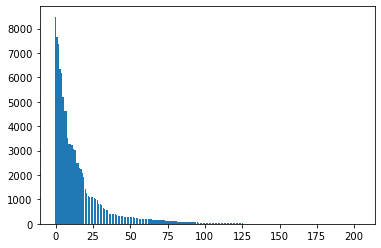

In [121]:
show_statistics(count_attribuate_dist(bl_annotation['train']))

32132


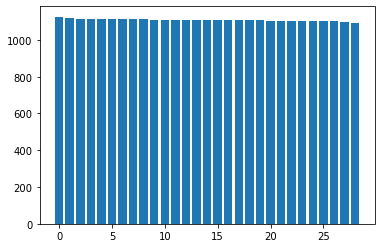

In [122]:
show_statistics(count_label_dist(bl_annotation['train']))

In [50]:
def print_image_by_index(annotation, cocottributes, setname='train', index=1):
    key = list(annotation[setname]['label'].keys())[index]
    img_path = annotation[setname]['path'][key]
    img = Image.open(img_path)
    
    att_array = cocottributes[setname]['attribute'][key]
    # List of COCO Attributes
    attr_details = sorted(cocottributes['attributes'], key=lambda x:x['id'])
    attr_names = [item['name'] for item in attr_details]
    pos_attrs = [a for ind, a in enumerate(attr_names) if att_array[ind] > 0.5]
    # 
    id2cat = {i:cat for cat,i in cocottributes['cat2id'].items()}
    category = id2cat[annotation[setname]['label'][key]]
    print_image_with_attributes(img, pos_attrs, category)
    
    
def print_image_by_class(annotation, cocottributes, setname='train', class_type=1, print_num=1, start=0):
    all_keys_for_class = []
    for key, val in annotation[setname]['label'].items():
        if val == class_type:
            all_keys_for_class.append(key)
    
    for i in range(print_num):
        key = all_keys_for_class[i + start]
        img_path = annotation[setname]['path'][key]
        img = Image.open(img_path)
    
        att_array = cocottributes[setname]['attribute'][key]
        # List of COCO Attributes
        attr_details = sorted(cocottributes['attributes'], key=lambda x:x['id'])
        attr_names = [item['name'] for item in attr_details]
        pos_attrs = [a for ind, a in enumerate(attr_names) if att_array[ind] > 0.5]
        # 
        id2cat = {i:cat for cat,i in cocottributes['cat2id'].items()}
        category = id2cat[annotation[setname]['label'][key]]
        print_image_with_attributes(img, pos_attrs, category)

    

def print_image_with_attributes(img, attrs, category):

    fig = plt.figure()
    plt.imshow(img)
    plt.axis('off')  # clear x- and y-axes
    plt.title(category)
    for ind, a in enumerate(attrs):
        plt.text(min(img.size[1]+10, 1000), (ind+1)*img.size[1]*0.1, a, ha='left')

In [51]:
lt_annotation['train']['label']

{'479233': 0,
 '123231': 0,
 '480726': 0,
 '605465': 0,
 '5399': 0,
 '206137': 0,
 '757240': 0,
 '627631': 0,
 '437135': 0,
 '741183': 0,
 '214347': 0,
 '449162': 0,
 '448012': 0,
 '434484': 0,
 '866889': 0,
 '17923': 0,
 '244537': 0,
 '203902': 0,
 '195120': 0,
 '466445': 0,
 '761403': 0,
 '443376': 0,
 '602414': 0,
 '285827': 0,
 '360813': 0,
 '600723': 0,
 '468998': 0,
 '463741': 0,
 '133905': 0,
 '451735': 0,
 '168917': 0,
 '5535': 0,
 '615134': 0,
 '459929': 0,
 '746126': 0,
 '363073': 0,
 '596897': 0,
 '80859': 0,
 '17229': 0,
 '362049': 0,
 '745956': 0,
 '866436': 0,
 '611789': 0,
 '439818': 0,
 '462935': 0,
 '356618': 0,
 '470640': 0,
 '203818': 0,
 '355729': 0,
 '621702': 0,
 '458489': 0,
 '274601': 0,
 '756487': 0,
 '467877': 0,
 '160874': 0,
 '756573': 0,
 '281428': 0,
 '451731': 0,
 '377687': 0,
 '746644': 0,
 '618659': 0,
 '880343': 0,
 '627740': 0,
 '749467': 0,
 '442056': 0,
 '605437': 0,
 '739376': 0,
 '630386': 0,
 '587204': 0,
 '369178': 0,
 '446946': 0,
 '617665': 0,

In [33]:
# List of COCO Attributes
attr_details = sorted(cocottributes_bl['attributes'], key=lambda x:x['id'])
attr_names = [item['name'] for item in attr_details]
attr_names

['standing',
 'sitting',
 'laying',
 'walking',
 'watching / looking',
 'eating',
 'waiting',
 'moving',
 'playing',
 'sleeping',
 'working',
 'running',
 'hiding',
 'riding',
 'drinking',
 'swimming',
 'smiling',
 'jumping',
 'flying',
 'traveling',
 'enjoying',
 'thinking',
 'loving',
 'holding',
 'feeding',
 'talking',
 'floating',
 'skiing',
 'hunting',
 'listening',
 'hanging',
 'grazing',
 'skating',
 'leaning',
 'smelling / sniffing',
 'socializing',
 'stretching',
 'driving',
 'cooking',
 'learning',
 'following',
 'surfing',
 'reading',
 'climbing',
 'bending',
 'fishing',
 'cuddling',
 'smelling',
 'panting',
 'participating',
 'racing',
 'serving',
 'crouching',
 'reaching',
 'landing',
 'hiking ',
 'waving',
 'spectating',
 'exercising ',
 'carrying',
 'snowboarding',
 'vacationing ',
 'shopping',
 'catching',
 'laughing',
 'celebrating',
 'angry',
 'happy',
 'unhappy',
 'hungry',
 'friendly',
 'sleepy',
 'lazy',
 'dry',
 'alone / lonely',
 'dirty',
 'urban',
 'busy',
 'hea

In [31]:
#ex_inds = [0,10]
#for ex_ind in ex_inds:
#    print_image_by_index(lt_annotation, cocottributes_lt, setname='train', index=ex_ind)

/home/kaihua/anaconda3/envs/adv/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


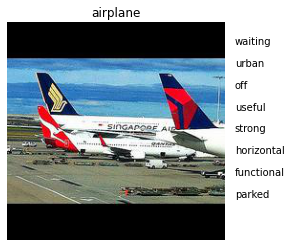

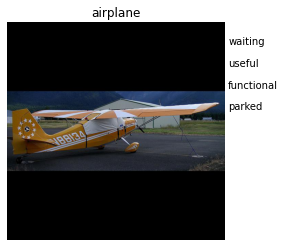

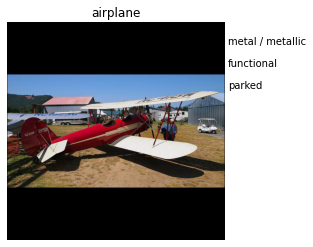

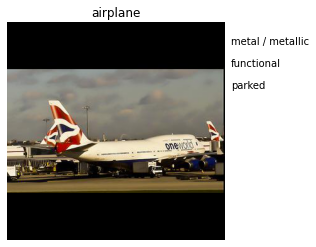

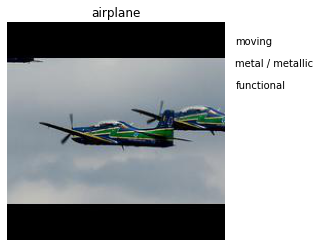

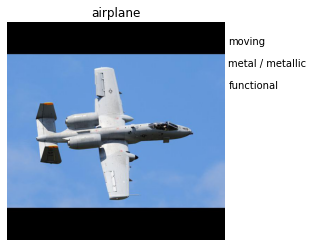

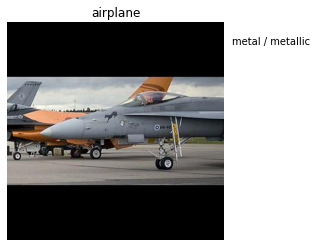

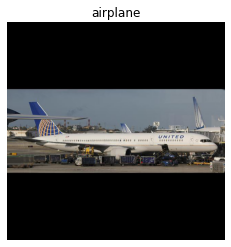

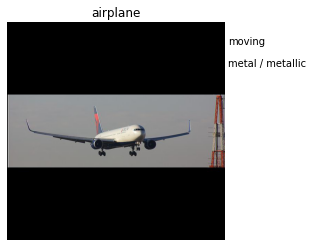

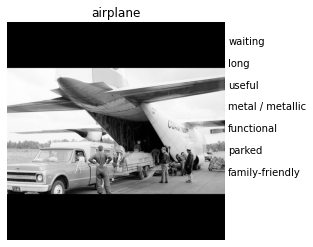

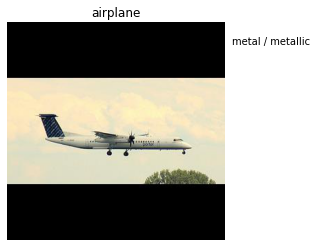

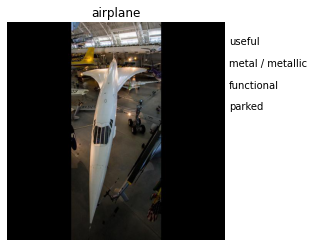

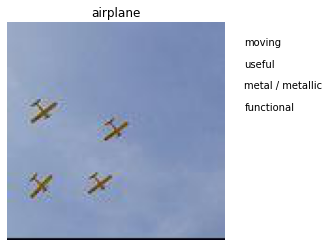

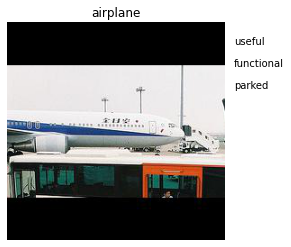

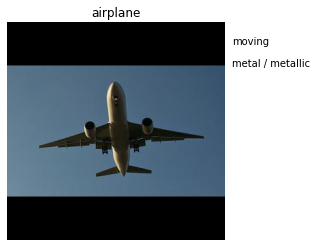

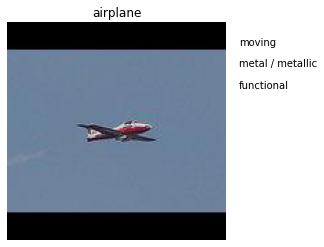

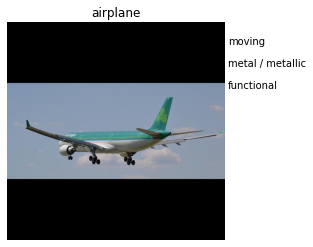

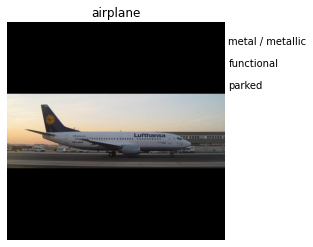

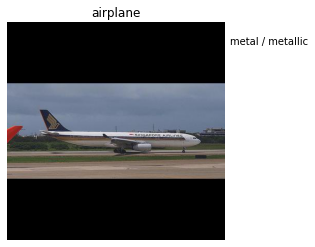

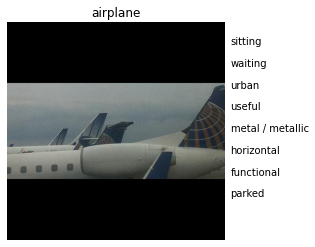

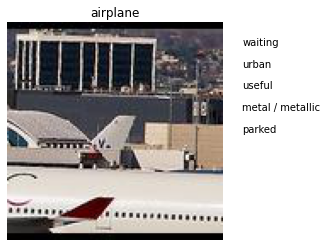

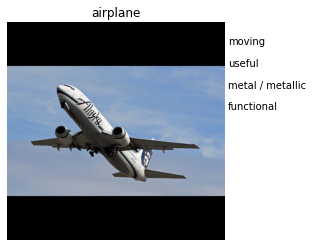

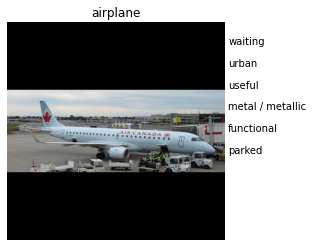

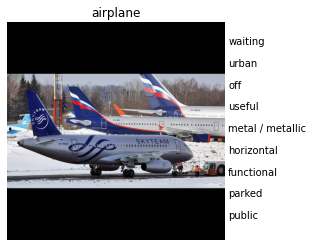

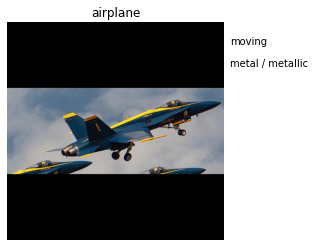

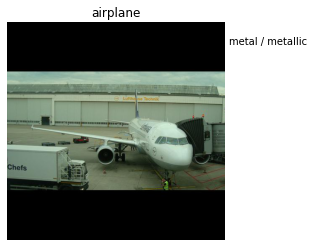

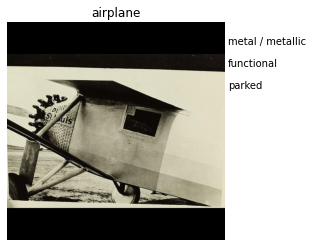

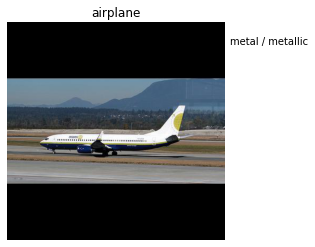

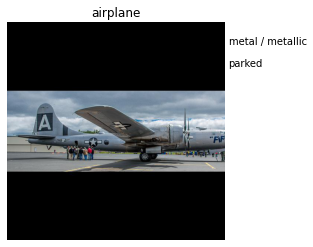

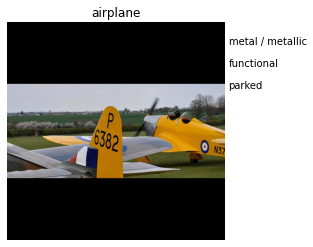

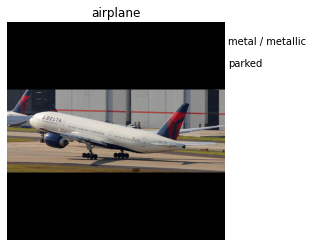

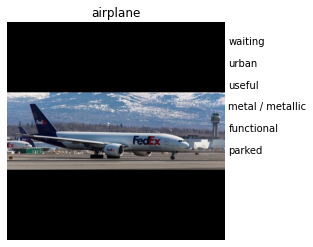

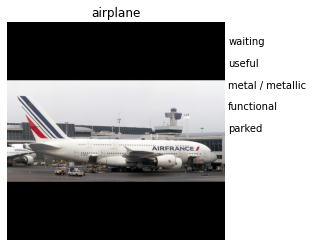

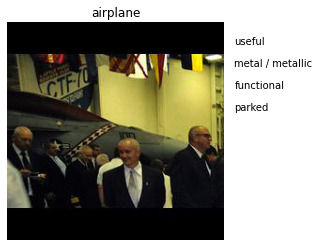

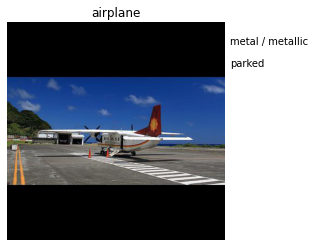

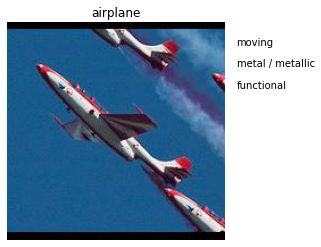

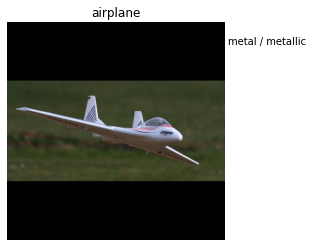

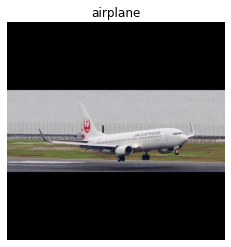

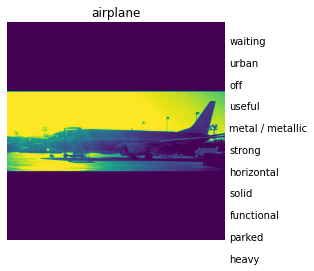

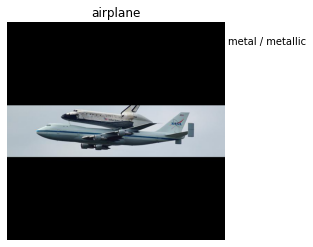

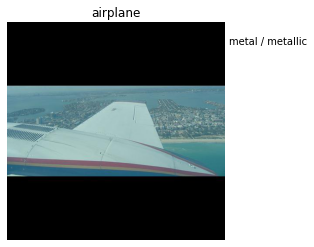

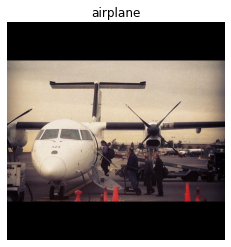

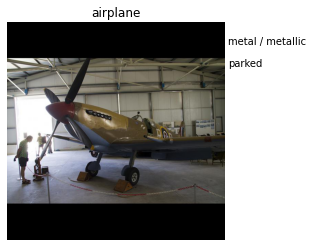

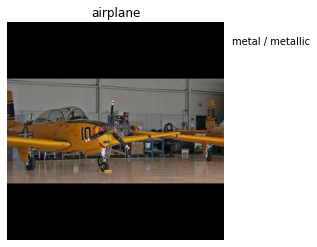

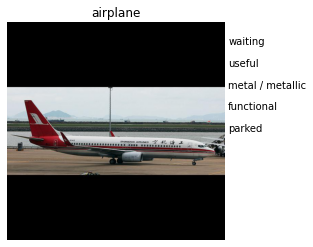

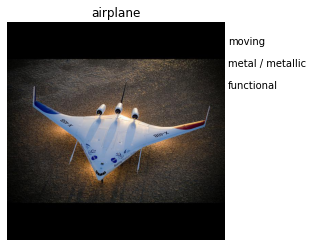

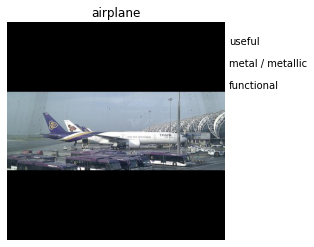

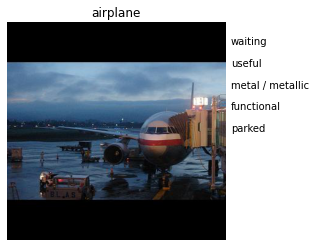

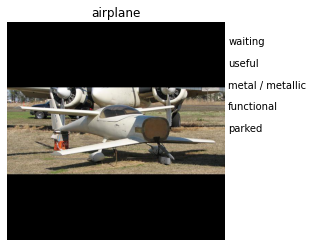

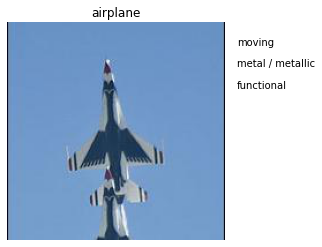

In [128]:
print_image_by_class(lt_annotation, cocottributes_lt, setname='train', class_type=21, print_num=50, start=50)